<a href="https://colab.research.google.com/https:/github.com/fgonzaleumbc/DATA601/blob/main/Lecture09/21b_Relational_Databases_and_SQL.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<div class="alert alert-block alert-info">
Notebook Author:<br>Felix Gonzalez, P.E. <br> Adjunct Instructor, <br> Division of Professional Studies <br> Computer Science and Electrical Engineering <br> University of Maryland Baltimore County <br> fgonzale@umbc.edu
</div>

This notebook provides an overview of basic concepts in relational databases and working with SQL databases in Python.

# Table of Contents
[Python Libraries in this Notebook](#Python-Libraries-in-this-Notebook)

[Functions Used in Notebook](#Functions-Used-in-Notebook)

[Relational Databases](#Relational-Databases)

[Relational Dataset Example: Flights Data](#Relational-Dataset-Example:-Flights-Data)

[Structured Query Language (SQL)](#Structured-Query-Language-(SQL))

- [Connecting to SQL database](#Connecting-to-SQL-database)

- [SQL Operations and Syntax](#SQL-Operations-and-Syntax)

- [Reading SQL with Pandas](#Reading-SQL-with-Pandas)

- [Data Cleaning](#Data-Cleaning)

# Python Libraries in this Notebook
[Return to Table of Contents](#Table-of-Contents)

In [41]:
import pandas as pd
import sqlite3 # https://docs.python.org/3/library/sqlite3.html
import matplotlib.pyplot as plt

import ipywidgets as widgets
from IPython.display import Image, display, HTML, clear_output
from ipywidgets import interact, interact_manual

# Functions Used in Notebook
[Return to Table of Contents](#Table-of-Contents)

In [2]:
def make_df(cols, ind):
    """Quickly make a DataFrame"""
    data = {c: [str(c) + str(i) for i in ind]
            for c in cols}
    return pd.DataFrame(data, ind)


class display(object):
    """Display HTML representation of multiple objects"""
    template = """<div style="float: left; padding: 10px;">
    <p style='font-family:"Courier New", Courier, monospace'>{0}</p>{1}
    </div>"""
    def __init__(self, *args):
        self.args = args
        
    def _repr_html_(self):
        return '\n'.join(self.template.format(a, eval(a)._repr_html_())
                         for a in self.args)
    
    def __repr__(self):
        return '\n\n'.join(a + '\n' + repr(eval(a))
                           for a in self.args)

# Relational Databases
[Return to Table of Contents](#Table-of-Contents)

By this point we have seen a few examples of relational datasets, dataframes or databases. For example, we have seen various dataframes that are "related" by a feature. The structure of databases typically follow a relational model wher there may be many tables in a database that are related by a unique key or identifier (e.g., report number) or other features. A primary key uniquely identifies an observation in its own table. A foreign key uniquely identifies an observation in another table. 

Documentation References:
- [The content of this notebook is taken from: Jake VanderPlas' Python Data Science Handbook](https://jakevdp.github.io/PythonDataScienceHandbook/index.html)
- [Relational Data: R for data science 13.2](https://r4ds.had.co.nz/relational-data.html)
- [pd.merge - documentation](https://pandas.pydata.org/pandas-docs/stable/user_guide/merging.html#database-style-dataframe-or-named-series-joining-merging)
- [Pandas: Concat, Merge, Join](https://pandas.pydata.org/pandas-docs/stable/user_guide/merging.html)
- [Pandas Apply Function](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.apply.html)

In this section let's explore the relationship of a few employee related dataframes.

In [3]:
df1 = pd.DataFrame({'employee': ['Bob', 'Jake', 'Lisa', 'Sue'],
                    'group': ['Accounting', 'Engineering', 'Engineering', 'HR']})
df2 = pd.DataFrame({'employee': ['Lisa', 'Bob', 'Jake', 'Sue'],
                    'hire_date': [2004, 2008, 2012, 2014]})
display('df1', 'df2')

,employee,group
0,Bob,Accounting
1,Jake,Engineering
2,Lisa,Engineering
3,Sue,HR
,employee,hire_date
0,Lisa,2004
1,Bob,2008
2,Jake,2012
3,Sue,2014


Let's take a look at the relations for these tables

In [4]:
# We can use pd.merge method to combine these dataframes
df3 = pd.merge(df1, df2)

In [5]:
df4 = pd.DataFrame({'group': ['Accounting', 'Engineering', 'HR'],
                    'supervisor': ['Carly', 'Guido', 'Steve']})
display('df3', 'df4', )

df3
  employee        group  hire_date
0      Bob   Accounting       2008
1     Jake  Engineering       2012
2     Lisa  Engineering       2004
3      Sue           HR       2014

df4
         group supervisor
0   Accounting      Carly
1  Engineering      Guido
2           HR      Steve

Let's discuss the relationship between tables here

In [6]:
## Use again to combine df3 and df4
pd.merge(df3, df4)

,employee,group,hire_date,supervisor
0,Bob,Accounting,2008,Carly
1,Jake,Engineering,2012,Guido
2,Lisa,Engineering,2004,Guido
3,Sue,HR,2014,Steve


In [7]:
df5 = pd.DataFrame({'group': ['Accounting', 'Accounting',
                              'Engineering', 'Engineering', 'HR', 'HR'],
                    'skills': ['math', 'spreadsheets', 'coding', 'linux',
                               'spreadsheets', 'organization']})
display('df1', 'df5')

,employee,group
0,Bob,Accounting
1,Jake,Engineering
2,Lisa,Engineering
3,Sue,HR
,group,skills
0,Accounting,math
1,Accounting,spreadsheets
2,Engineering,coding
3,Engineering,linux
4,HR,spreadsheets


Let's discuss the relationship between tables here.

In [8]:
## Merge df1 and df5 and display the resulting table
pd.merge(df1, df5)

,employee,group,skills
0,Bob,Accounting,math
1,Bob,Accounting,spreadsheets
2,Jake,Engineering,coding
3,Jake,Engineering,linux
4,Lisa,Engineering,coding
5,Lisa,Engineering,linux
6,Sue,HR,spreadsheets
7,Sue,HR,organization


In [9]:
df3 = pd.DataFrame({'name': ['Bob', 'Jake', 'Lisa'],
                    'salary': [70000, 80000, 120000,]})


display('df1', 'df3' )

,employee,group
0,Bob,Accounting
1,Jake,Engineering
2,Lisa,Engineering
3,Sue,HR
,name,salary
0,Bob,70000
1,Jake,80000
2,Lisa,120000


Now let's combine df1 and df3 based on employee and name keys respectively.

In [10]:
## use pd.merge method with 'left_on', 'right_on' keywords -- we can also play with 'how' parameter here

pd.merge(df1, df3, left_on = 'employee', right_on  = 'name', how = 'outer')

,employee,group,name,salary
0,Bob,Accounting,Bob,70000.0
1,Jake,Engineering,Jake,80000.0
2,Lisa,Engineering,Lisa,120000.0
3,Sue,HR,NaN,NaN


Inner-Outer

In [11]:
df6 = pd.DataFrame({'name': ['Peter', 'Paul', 'Mary'],
                    'food': ['fish', 'beans', 'bread']},
                   columns=['name', 'food'])
df7 = pd.DataFrame({'name': ['Mary', 'Joseph'],
                    'drink': ['wine', 'beer']},
                   columns=['name', 'drink'])

display('df6', 'df7', "pd.merge(df6, df7, how = 'outer')")

df6
    name   food
0  Peter   fish
1   Paul  beans
2   Mary  bread

df7
     name drink
0    Mary  wine
1  Joseph  beer

pd.merge(df6, df7, how = 'outer')
     name   food drink
0   Peter   fish   NaN
1    Paul  beans   NaN
2    Mary  bread  wine
3  Joseph    NaN  beer

In [12]:
display('df6', 'df7', "pd.merge(df6, df7, how='outer')")

df6
    name   food
0  Peter   fish
1   Paul  beans
2   Mary  bread

df7
     name drink
0    Mary  wine
1  Joseph  beer

pd.merge(df6, df7, how='outer')
     name   food drink
0   Peter   fish   NaN
1    Paul  beans   NaN
2    Mary  bread  wine
3  Joseph    NaN  beer

# Relational Dataset Example: Flights Data
[Return to Table of Contents](#Table-of-Contents)

In the flights dataset we may have many tables that we can access with information such as with further information on airports, planes, daily weather, and airlines. The figure below shows some of these relationships. Further this section provides other datasets that we can merge with the Flights data to 

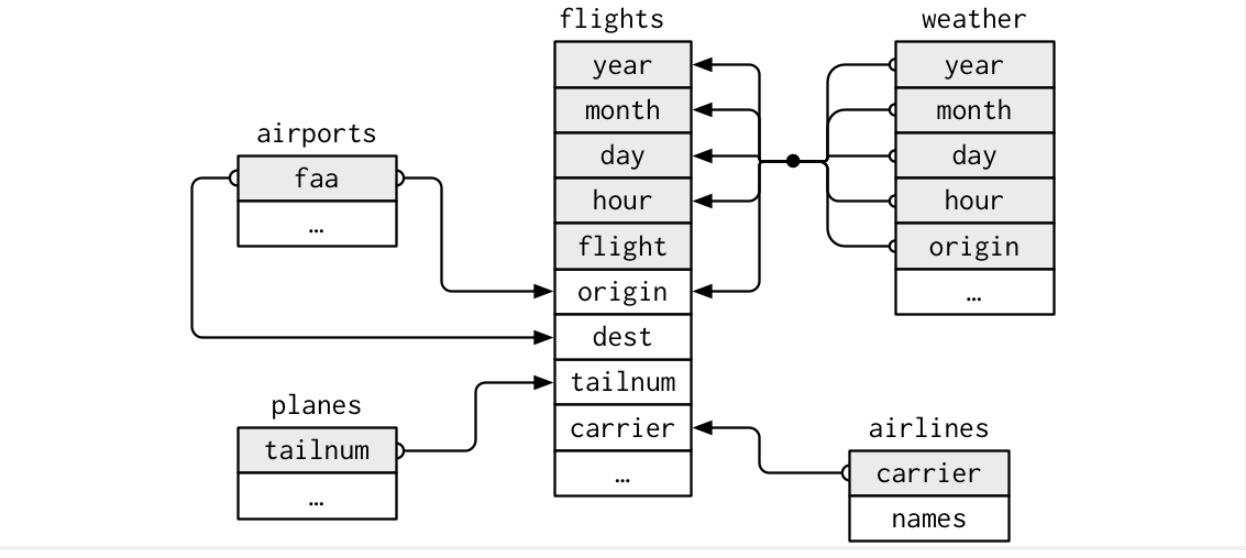

__Flights__
We already worked with `flights` data a lot.

In [13]:
flights = pd.read_csv('https://raw.githubusercontent.com/simsekergun/DATA601/main/Project2/datasets/flights.csv')
flights.head(4)

,Unnamed: 0,year,month,day,dep_time,dep_delay,arr_time,arr_delay,carrier,tailnum,flight,origin,dest,air_time,distance,hour,minute
0,361,2013,1,1,1315.0,-2.0,1413.0,-10.0,EV,N13538,4112,EWR,ALB,33.0,143,13.0,15.0
1,570,2013,1,1,1655.0,34.0,1804.0,40.0,EV,N19554,3260,EWR,ALB,36.0,143,16.0,55.0
2,785,2013,1,1,2056.0,52.0,2156.0,44.0,EV,N12540,4170,EWR,ALB,31.0,143,20.0,56.0
3,1280,2013,1,2,1332.0,5.0,1419.0,-14.0,EV,N14153,4316,EWR,ALB,33.0,143,13.0,32.0


__Airlines__
Note that `airlines` dataframe has the airline names and their abbreviation.

In [14]:
airlines = pd.read_csv('https://raw.githubusercontent.com/simsekergun/DATA601/main/Project2/datasets/airlines.csv')
airlines.head(4)

,carrier,name
0,9E,Endeavor Air Inc.
1,AA,American Airlines Inc.
2,AS,Alaska Airlines Inc.
3,B6,JetBlue Airways


__Airports__
`Airports` has the information (location, time-zone, name, etc.) of the airports.

In [15]:
airports = pd.read_csv('https://raw.githubusercontent.com/simsekergun/DATA601/main/Project2/datasets/airports.csv')
airports.head(4)

,faa,name,lat,lon,alt,tz,dst,tzone
0,04G,Lansdowne Airport,41.130472,-80.619583,1044,-5,A,America/New_York
1,06A,Moton Field Municipal Airport,32.460572,-85.680028,264,-6,A,America/Chicago
2,06C,Schaumburg Regional,41.989341,-88.101243,801,-6,A,America/Chicago
3,06N,Randall Airport,41.431912,-74.391561,523,-5,A,America/New_York


__Planes__
`planes` dataframe contains information about the planes and their tailnumbers. 

In [16]:
planes = pd.read_csv('https://raw.githubusercontent.com/simsekergun/DATA601/main/Project2/datasets/planes.csv')
planes.head(4)

,tailnum,year,type,manufacturer,model,engines,seats,speed,engine
0,N10156,2004.0,Fixed wing multi engine,EMBRAER,EMB-145XR,2,55,NaN,Turbo-fan
1,N102UW,1998.0,Fixed wing multi engine,AIRBUS INDUSTRIE,A320-214,2,182,NaN,Turbo-fan
2,N103US,1999.0,Fixed wing multi engine,AIRBUS INDUSTRIE,A320-214,2,182,NaN,Turbo-fan
3,N104UW,1999.0,Fixed wing multi engine,AIRBUS INDUSTRIE,A320-214,2,182,NaN,Turbo-fan


__Weather__
`weather` dataframe contains weather related data for each airport in NYC.

In [17]:
weather = pd.read_csv('https://raw.githubusercontent.com/simsekergun/DATA601/main/Project2/datasets/weatherNYhourly.csv')
weather.head(4)

,origin,year,month,day,hour,temp,dewp,humid,wind_dir,wind_speed,wind_gust,precip,pressure,visib,time_hour
0,EWR,2013,1,1,1,39.02,26.06,59.37,270.0,10.35702,NaN,0.0,1012.0,10.0,2013-01-01T06:00:00Z
1,EWR,2013,1,1,2,39.02,26.96,61.63,250.0,8.05546,NaN,0.0,1012.3,10.0,2013-01-01T07:00:00Z
2,EWR,2013,1,1,3,39.02,28.04,64.43,240.0,11.50780,NaN,0.0,1012.5,10.0,2013-01-01T08:00:00Z
3,EWR,2013,1,1,4,39.92,28.04,62.21,250.0,12.65858,NaN,0.0,1012.2,10.0,2013-01-01T09:00:00Z


#### Merging Tables

In [18]:
# Let's simplyfy the flights table.
flights2 = flights[['year', 'month', 'day', 'hour', 'origin', 'dest', 'tailnum', 'carrier']].copy()
print(flights.shape)
flights2.head(2)

(145735, 17)


,year,month,day,hour,origin,dest,tailnum,carrier
0,2013,1,1,13.0,EWR,ALB,N13538,EV
1,2013,1,1,16.0,EWR,ALB,N19554,EV


In [20]:
airlines.head(2)

,carrier,name
0,9E,Endeavor Air Inc.
1,AA,American Airlines Inc.


Let's merge flights2 with airlines using 'carrier' keyword

In [21]:
# Let's use merge method to combine airlines and flights
flights2.merge(airlines, on = ['carrier'])

,year,month,day,hour,origin,dest,tailnum,carrier,name
0,2013,1,1,13.0,EWR,ALB,N13538,EV,ExpressJet Airlines Inc.
1,2013,1,1,16.0,EWR,ALB,N19554,EV,ExpressJet Airlines Inc.
2,2013,1,1,20.0,EWR,ALB,N12540,EV,ExpressJet Airlines Inc.
3,2013,1,2,13.0,EWR,ALB,N14153,EV,ExpressJet Airlines Inc.
4,2013,1,2,17.0,EWR,ALB,N14153,EV,ExpressJet Airlines Inc.
...,...,...,...,...,...,...,...,...,...
145730,2013,12,31,14.0,JFK,LAX,N622VA,VX,Virgin America
145731,2013,12,31,16.0,JFK,LAX,N630VA,VX,Virgin America
145732,2013,6,15,16.0,EWR,DTW,N913EV,OO,SkyWest Airlines Inc.
145733,2013,6,22,18.0,EWR,DTW,N427SW,OO,SkyWest Airlines Inc.


In [22]:
# Let's explore our new flights2 and weather data.
display('flights2.head(2)', 'weather.head(2)')

flights2.head(2)
   year  month  day  hour origin dest tailnum carrier
0  2013      1    1  13.0    EWR  ALB  N13538      EV
1  2013      1    1  16.0    EWR  ALB  N19554      EV

weather.head(2)
  origin  year  month  day  hour   temp   dewp  humid  wind_dir  wind_speed  \
0    EWR  2013      1    1     1  39.02  26.06  59.37     270.0    10.35702   
1    EWR  2013      1    1     2  39.02  26.96  61.63     250.0     8.05546   

   wind_gust  precip  pressure  visib             time_hour  
0        NaN     0.0    1012.0   10.0  2013-01-01T06:00:00Z  
1        NaN     0.0    1012.3   10.0  2013-01-01T07:00:00Z

In [23]:
# Let's merge flights2 and weather on multiple keys
pd.merge(flights2, weather, on  = ['year', 'month', 'day', 'hour', 'origin'], how = 'left')

,year,month,day,hour,origin,dest,tailnum,carrier,temp,dewp,humid,wind_dir,wind_speed,wind_gust,precip,pressure,visib,time_hour
0,2013,1,1,13.0,EWR,ALB,N13538,EV,39.20,28.40,69.67,330.0,16.11092,NaN,0.0,NaN,10.0,2013-01-01T18:00:00Z
1,2013,1,1,16.0,EWR,ALB,N19554,EV,37.04,19.94,49.62,300.0,13.80936,20.71404,0.0,1012.1,10.0,2013-01-01T21:00:00Z
2,2013,1,1,20.0,EWR,ALB,N12540,EV,32.00,15.08,49.19,310.0,14.96014,NaN,0.0,1015.2,10.0,2013-01-02T01:00:00Z
3,2013,1,2,13.0,EWR,ALB,N14153,EV,33.98,12.92,41.33,290.0,16.11092,25.31716,0.0,1017.3,10.0,2013-01-02T18:00:00Z
4,2013,1,2,17.0,EWR,ALB,N14153,EV,32.00,12.92,44.74,290.0,12.65858,18.41248,0.0,1019.7,10.0,2013-01-02T22:00:00Z
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
145730,2013,12,31,20.0,JFK,LAX,N768JB,B6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
145731,2013,12,31,21.0,JFK,LAX,N332AA,AA,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
145732,2013,12,31,NaN,EWR,LAX,NaN,UA,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
145733,2013,12,31,NaN,EWR,LAX,NaN,UA,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [24]:
display('flights2.head(2)', 'planes.head(2)')

flights2.head(2)
   year  month  day  hour origin dest tailnum carrier
0  2013      1    1  13.0    EWR  ALB  N13538      EV
1  2013      1    1  16.0    EWR  ALB  N19554      EV

planes.head(2)
  tailnum    year                     type      manufacturer      model  \
0  N10156  2004.0  Fixed wing multi engine           EMBRAER  EMB-145XR   
1  N102UW  1998.0  Fixed wing multi engine  AIRBUS INDUSTRIE   A320-214   

   engines  seats  speed     engine  
0        2     55    NaN  Turbo-fan  
1        2    182    NaN  Turbo-fan

In [25]:
# Let's merge flights2 with planes using 'tailnum' but make sure that the resulting table columns named appropriately.
flights2.merge(planes, on = 'tailnum', suffixes = ['_flights', '_planes'], how = 'left')

,year_flights,month,day,hour,origin,dest,tailnum,carrier,year_planes,type,manufacturer,model,engines,seats,speed,engine
0,2013,1,1,13.0,EWR,ALB,N13538,EV,2001.0,Fixed wing multi engine,EMBRAER,EMB-145LR,2.0,55.0,NaN,Turbo-fan
1,2013,1,1,16.0,EWR,ALB,N19554,EV,2002.0,Fixed wing multi engine,EMBRAER,EMB-145LR,2.0,55.0,NaN,Turbo-fan
2,2013,1,1,20.0,EWR,ALB,N12540,EV,2001.0,Fixed wing multi engine,EMBRAER,EMB-145LR,2.0,55.0,NaN,Turbo-fan
3,2013,1,2,13.0,EWR,ALB,N14153,EV,2003.0,Fixed wing multi engine,EMBRAER,EMB-145XR,2.0,55.0,NaN,Turbo-fan
4,2013,1,2,17.0,EWR,ALB,N14153,EV,2003.0,Fixed wing multi engine,EMBRAER,EMB-145XR,2.0,55.0,NaN,Turbo-fan
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
145730,2013,12,31,20.0,JFK,LAX,N768JB,B6,2009.0,Fixed wing multi engine,AIRBUS,A320-232,2.0,200.0,NaN,Turbo-fan
145731,2013,12,31,21.0,JFK,LAX,N332AA,AA,1987.0,Fixed wing multi engine,BOEING,767-223,2.0,255.0,NaN,Turbo-fan
145732,2013,12,31,NaN,EWR,LAX,NaN,UA,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
145733,2013,12,31,NaN,EWR,LAX,NaN,UA,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


# Structured Query Language (SQL)
[Return to Table of Contents](#Table-of-Contents)

[Structured Query Language (SQL)](https://en.wikipedia.org/wiki/SQL) domain-specific language used in programming and designed for managing data held in a relational database management system (RDBMS), or for stream processing in a relational data stream management system (RDSMS). It is particularly useful in handling structured data, i.e. data incorporating relations among entities and variables. Main advantages include introduction of the concept of accessing many records with one single command and eliminates the need to specify how to reach a record (e.g. with or without an index). SQL became a standard of the American National Standards Institute (ANSI) in 1986 and of the International Organization for Standardization (ISO) in 1987.[11] Since then, the standard has been revised to include a larger set of features. Despite the existence of standards, most SQL code requires at least some changes before being ported to different database systems.


There are various SQL RDMS including but not limited to  Microsoft SQL Server, Oracle, PostgreSQL, SQLite and MySQL. There are various SQL libraries in python that are compatible with different SQL RDMS.
- Postgre SQL Database Libraries: “psycopg2” or “pg8000”
- MySQL Database Libraries, “mysql-connector-python” or “oursql”
- Oracle SQL Database libraries: “cx-Oracle”
- Microsoft SQL Server and other database libraries: “pyodbc” or “pymssql”

Also, SQLAlchemy is a Python library that maps databases (e.g., tables, records)to python objects (e.g., dataframe).

References: <br>
- Comparison of database management systems:
    - https://wlogz.io/blog/relational-database-comparison/amp/
    - https://www.digitalocean.com/community/tutorials/sqlite-vs-mysql-vs-postgresql-a-comparison-of-relational-database-management-systems

- Code Examples: SQL Database reading to/from Python Pandas:
    - https://datatofish.com/pandas-dataframe-to-sql/
    - https://medium.com/@devartimahakalkar/connecting-sql-datasets-with-pandas-105f8eb68f1a
    - https://learn.microsoft.com/en-us/sql/machine-learning/data-exploration/python-dataframe-pandas?view=sql-server-ver16
    - https://towardsdatascience.com/work-with-sql-in-python-using-sqlalchemy-and-pandas-cd7693def708
    - https://learn.microsoft.com/en-us/sql/machine-learning/data-exploration/python-dataframe-sql-server?view=sql-server-ver16

# Connecting to SQL database
[Return to Table of Contents](#Table-of-Contents)

Note that in this case we are using a sample database (.db) file in the output_data. Note that the database file was created using the Jupyter Notebook "21a_SQL_DB_Test_File_Creation.ipynb" and combined various csv files from the airline industry data as tables within the database file. 

In [26]:
# Creates a connection to flights_database.db: https://docs.python.org/3/library/sqlite3.html#sqlite3.connect
conn = sqlite3.connect('./output_data/airline_data/flights_database.db')
# Direct connection to a database is possible with appropriate approval from database owner.
c = conn.cursor() # Creates cursor object: https://en.wikipedia.org/wiki/Cursor_(databases)

In [27]:
# Query name of tables
sql_query = "SELECT name FROM sqlite_master WHERE type='table';"
# Executes the query in the cursor object.
c.execute(sql_query);

In [28]:
c.fetchall() # List of tables in the SQL database.

[('flights',), ('airports',), ('airlines',)]

In [29]:
sql_query = "select * from flights" # Selects the flights table.
c.execute(sql_query);

In [30]:
# Prints description (i.e., column names) of the flights table.
print(list(map(lambda x: x[0], c.description))) 

['Unnamed: 0', 'year', 'month', 'day', 'dep_time', 'dep_delay', 'arr_time', 'arr_delay', 'carrier', 'tailnum', 'flight', 'origin', 'dest', 'air_time', 'distance', 'hour', 'minute']


In [31]:
# Same as above but using list comprehensions
print([description[0] for description in c.description])

['Unnamed: 0', 'year', 'month', 'day', 'dep_time', 'dep_delay', 'arr_time', 'arr_delay', 'carrier', 'tailnum', 'flight', 'origin', 'dest', 'air_time', 'distance', 'hour', 'minute']


In [32]:
sql_query = "select * from airports" # Selects the airports table.
c.execute(sql_query);

In [33]:
# List of the airports table column names.
print([description[0] for description in c.description])

['faa', 'name', 'lat', 'lon', 'alt', 'tz', 'dst', 'tzone']


# SQL Operations and Syntax
[Return to Table of Contents](#Table-of-Contents)

Performing queries in SQL uses its own syntax and various tutorials can be found online for performing learning SQL syntax. Operations include querying data, sorting data, filtering data, conditional expressions, joining multiple tables, aggregate functions, grouping, set operators, modifying tables, etc. See examples of SQL data selection in the next section.

References: <br>
- https://www.sqltutorial.org/
- https://www.w3schools.com/sql/sql_syntax.asp
- https://www.w3schools.com/sql/
- https://swcarpentry.github.io/sql-novice-survey/03-filter/

# Reading SQL with Pandas
[Return to Table of Contents](#Table-of-Contents)

There are various functions that can be used to read SQL connection. This includes [pd.read_sql_query()](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.read_sql_query.html), [pd.read_sql_table()](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.read_sql_table.html#pandas.read_sql_table) and [pd.read_sql()](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.read_sql.html#pandas.read_sql). 

In [34]:
pd.read_sql_query("SELECT * FROM flights", conn) # Using Pandas to queary the SQL database. '*' selects all data in table.
# We can filter data using the SQL queary or use Pandas to filter the dataframe.
# For large SQL databases it may make sense to do a query in SQL first as it will load less data into Pandas.

,Unnamed: 0,year,month,day,dep_time,dep_delay,arr_time,arr_delay,carrier,tailnum,flight,origin,dest,air_time,distance,hour,minute
0,361,2013,1,1,1315,-2,1413,-10,EV,N13538,4112,EWR,ALB,33,143,13,15
1,570,2013,1,1,1655,34,1804,40,EV,N19554,3260,EWR,ALB,36,143,16,55
2,785,2013,1,1,2056,52,2156,44,EV,N12540,4170,EWR,ALB,31,143,20,56
3,1280,2013,1,2,1332,5,1419,-14,EV,N14153,4316,EWR,ALB,33,143,13,32
4,1537,2013,1,2,1746,85,1835,71,EV,N14153,3260,EWR,ALB,31,143,17,46
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
145730,111241,2013,12,31,2037,-3,2351,-8,B6,N768JB,523,JFK,LAX,354,2475,20,37
145731,111260,2013,12,31,2128,-7,101,6,AA,N332AA,185,JFK,LAX,360,2475,21,28
145732,111287,2013,12,31,NA,NA,NA,NA,UA,None,1455,EWR,LAX,NA,2454,NA,NA
145733,111290,2013,12,31,NA,NA,NA,NA,UA,None,1493,EWR,LAX,NA,2454,NA,NA


In [35]:
# Using the read_sql we can select specific columns.
pd.read_sql('SELECT year, dep_delay, carrier, origin, dest, air_time, distance FROM flights', conn)

,year,dep_delay,carrier,origin,dest,air_time,distance
0,2013,-2,EV,EWR,ALB,33,143
1,2013,34,EV,EWR,ALB,36,143
2,2013,52,EV,EWR,ALB,31,143
3,2013,5,EV,EWR,ALB,33,143
4,2013,85,EV,EWR,ALB,31,143
...,...,...,...,...,...,...,...
145730,2013,-3,B6,JFK,LAX,354,2475
145731,2013,-7,AA,JFK,LAX,360,2475
145732,2013,NA,UA,EWR,LAX,NA,2454
145733,2013,NA,UA,EWR,LAX,NA,2454


In [36]:
# This query selects the specified columns and filters for departure delay less than 5 and excludes values of "NA".
pd.read_sql('''SELECT year, dep_delay, carrier, origin, dest, air_time, distance FROM flights
WHERE dep_delay < 5 AND dep_delay NOT IN ("NA")''', conn)

,year,dep_delay,carrier,origin,dest,air_time,distance
0,2013,-2,EV,EWR,ALB,33,143
1,2013,34,EV,EWR,ALB,36,143
2,2013,104,EV,EWR,ALB,30,143
3,2013,-7,EV,EWR,ALB,37,143
4,2013,-1,EV,EWR,ALB,33,143
...,...,...,...,...,...,...,...
125921,2013,-10,AA,JFK,LAX,348,2475
125922,2013,0,UA,EWR,LAX,357,2454
125923,2013,-1,DL,JFK,LAX,347,2475
125924,2013,-3,B6,JFK,LAX,354,2475


In [37]:
# Let's say we want to focus an analysis on only late departure flights
# Where late flights is defined as those with departure delay of 5 minutes or more.
# This query selects the specified columns and filters for departure delay higher than 5 and excludes values of "NA".
# Lets also assign a dataframe name.
df_flights = pd.read_sql('''SELECT year, dep_delay, carrier, origin, dest, air_time, distance FROM flights
WHERE dep_delay >= 5 AND dep_delay NOT IN ("NA")''', conn)

print(df_flights.shape)
df_flights.head(5)

# Our dataframe is reduced from over 140K to just over 16K rows of data.

(16071, 7)


,year,dep_delay,carrier,origin,dest,air_time,distance
0,2013,52,EV,EWR,ALB,31,143
1,2013,5,EV,EWR,ALB,33,143
2,2013,85,EV,EWR,ALB,31,143
3,2013,57,EV,EWR,ALB,31,143
4,2013,96,EV,EWR,ALB,30,143


In [38]:
# We could have uploaded the full flights table (all 145,735 rows) in Pandas and then done the filtering in Pandas.
# But that would be unnecessary use of resources and in cases may not even load.
# In these cases you may need to do a filtering in SQL and then as needed do further filtering in Pandas.

In [39]:
# Now that we have extracted what we need we can close the connection to the database.
conn.close() 

In [40]:
# Once the connection is closed you will see that we cannot read the database.
pd.read_sql('''SELECT year, dep_delay, carrier, origin, dest, air_time, distance FROM flights
WHERE dep_delay >= 10 AND dep_delay NOT IN ("NA")''', conn)

ProgrammingError: Cannot operate on a closed database.

# Data Cleaning
[Return to Table of Contents](#Table-of-Contents)

Once the SQL databaes is read with Pandas and loaded as a dataframe the rest of the porcesses (e.g., data cleaning) are the same.

In [ ]:
# Let's do a check on the data to make sure there are no issues.

In [ ]:
df_flights.isna().sum() # No columns have NA's

In [ ]:
df_flights.describe()
# Note this is only 2013 year.

In [ ]:
# We note that describe is only calculating the statistics for "year" and "distance" columns.
# This is probably because the other columns were detected as strings.
df_flights.info()
# Previous hypothesis seems correct.
# Carrier, Origin, and Destination should be objects.

In [ ]:
df_flights.describe(include='object')
# There seem to be 78 unique values.

In [ ]:
df_flights.dep_delay.value_counts(dropna = False) # ALl values seem to be numeric and no NA values as previously evaluated.
# We can probably tell Pandas to convert dep_delay and air_time columns to_numeric.

In [ ]:
df_flights["dep_delay"] = pd.to_numeric(df_flights["dep_delay"])
df_flights["air_time"] = pd.to_numeric(df_flights["air_time"])
# There seems to be an error in the air_time where there is still a "NA" string.

In [ ]:
# COnverts to column to numeric and on error uses coerce which puts NaN or Null to those values and filter nulls out. 
df_flights = df_flights[pd.to_numeric(df_flights['dep_delay'], 
                                      errors='coerce').notnull()].reset_index(drop = True)
df_flights = df_flights[pd.to_numeric(df_flights['air_time'], 
                                      errors='coerce').notnull()].reset_index(drop = True)

In [ ]:
df_flights.info()
# Still air_time is detected as an object

In [ ]:
df_flights['air_time'] = df_flights['air_time'].astype(int) # Lets change the data type to int.
df_flights.describe()

In [ ]:
# Let's export our cleaned dataframe as a CSV which we will use in the Jupyter Notebook Widget Dashboard Example.
df_flights.to_csv(r'.\output_data\airline_data\df_flights_cleaned_2.csv', 
                  encoding='utf-8-sig', index = False, header=True)

# NOTEBOOK END